In [2]:
import pandas as pd
import numpy as np
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
import mplcursors
%matplotlib widget

[nltk_data] Downloading package punkt to /home/a2211506/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import pandas as pd

In [4]:
acl_full_text = pd.read_parquet('acl_corpus_full-text.parquet')

In [5]:
acl_full_text
# p: acl pxx, xx: year

,acl_id,title,abstract,full_text
0,O02-2002,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,,,
2,R13-1042,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,,,
...,...,...,...,...
80008,P99-1056,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,,,


In [6]:
acl_full_text

,acl_id,title,abstract,full_text
0,O02-2002,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,,,
2,R13-1042,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,,,
...,...,...,...,...
80008,P99-1056,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,,,


In [7]:
with open("../anthology_2017_to_2022/anthology_abstracts_2017_2022_modified.bib.pkl", "rb") as f:
    anthology2017_2022 = pickle.load(f)

anthology2017_2022_pd = (pd.DataFrame(anthology2017_2022.entries))
anthology2017_2022_pd = anthology2017_2022_pd[(anthology2017_2022_pd["ENTRYTYPE"]  == "inproceedings") & (anthology2017_2022_pd["publisher"] == "Association for Computational Linguistics")] 
anthology2017_2022_pd.iloc[0:3]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,abstract,pages,doi,booktitle,author,language,volume,journal,number,isbn
1,https://aclanthology.org/2022.wordplay-1.1,Association for Computational Linguistics,"Seattle, United States",2022,jul,NaN,A Systematic Survey of Text Worlds as Embodied...,inproceedings,"""jan""sen-2022-systematic",Text Worlds are virtual environments for embod...,1--15,10.18653/v1/2022.wordplay-1.1,Proceedings of the 3rd Wordplay: When Language...,"Jansen, Peter",NaN,NaN,NaN,NaN,NaN
2,https://aclanthology.org/2022.wordplay-1.2,Association for Computational Linguistics,"Seattle, United States",2022,jul,NaN,A Minimal Computational Improviser Based on Or...,inproceedings,montfort-bartlett-fernandez-2022-minimal,A prototype system for playing a minimal impro...,16--24,10.18653/v1/2022.wordplay-1.2,Proceedings of the 3rd Wordplay: When Language...,"Montfort, Nick and\nBartlett Fernandez, Sebas...",NaN,NaN,NaN,NaN,NaN
4,https://aclanthology.org/2022.woah-1.2,Association for Computational Linguistics,"Seattle, Washington (Hybrid)",2022,jul,NaN,Towards Automatic Generation of Messages Count...,inproceedings,ashida-komachi-2022-towards,"With the widespread use of social media, onlin...",11--23,10.18653/v1/2022.woah-1.2,Proceedings of the Sixth Workshop on Online Ab...,"Ashida, Mana and\nKomachi, Mamoru",NaN,NaN,NaN,NaN,NaN


In [8]:
acl_2017_2022 = pd.merge(acl_full_text, anthology2017_2022_pd, how='inner', on="title")
acl_2017_2022

,acl_id,title,abstract_x,full_text,url,publisher,address,year,month,editor,...,abstract_y,pages,doi,booktitle,author,language,volume,journal,number,isbn
0,2020.nlp4convai-1.15,Probing Neural Dialog Models for Conversationa...,The predominant approach to open-domain dialog...,The predominant approach to open-domain dialog...,https://aclanthology.org/2020.nlp4convai-1.15,Association for Computational Linguistics,Online,2020,jul,NaN,...,The predominant approach to open-domain dialog...,132--143,10.18653/v1/2020.nlp4convai-1.15,Proceedings of the 2nd Workshop on Natural Lan...,"Saleh, Abdelrhman and\nDeutsch, Tovly and\nC...",NaN,NaN,NaN,NaN,NaN
1,P19-1167,Unsupervised Discovery of Gendered Language th...,Studying the ways in which language is gendere...,Studying the ways in which language is gendere...,https://aclanthology.org/P19-1167,Association for Computational Linguistics,"Florence, Italy",2019,jul,NaN,...,Studying the ways in which language is gendere...,1706--1716,10.18653/v1/P19-1167,Proceedings of the 57th Annual Meeting of the ...,"Hoyle, Alexander Miserlis and\nWolf-Sonkin, L...",NaN,NaN,NaN,NaN,NaN
2,2020.emnlp-main.50,Connecting the Dots: Event Graph Schema Induct...,Event schemas can guide our understanding and ...,Event schemas can guide our understanding and ...,https://aclanthology.org/2020.emnlp-main.50,Association for Computational Linguistics,Online,2020,nov,NaN,...,Event schemas can guide our understanding and ...,684--695,10.18653/v1/2020.emnlp-main.50,Proceedings of the 2020 Conference on Empirica...,"Li, Manling and\nZeng, Qi and\nLin, Ying an...",NaN,NaN,NaN,NaN,NaN
3,2020.nlp4convai-1.9,Automating Template Creation for Ranking-Based...,Dialogue response generation models that use t...,Dialogue response generation models that use t...,https://aclanthology.org/2020.nlp4convai-1.9,Association for Computational Linguistics,Online,2020,jul,NaN,...,Dialogue response generation models that use t...,71--78,10.18653/v1/2020.nlp4convai-1.9,Proceedings of the 2nd Workshop on Natural Lan...,"Chen, Jingxiang and\nElfardy, Heba and\nWang...",NaN,NaN,NaN,NaN,NaN
4,2021.codi-sharedtask.6,Adapted End-to-End Coreference Resolution Syst...,We present an effective system adapted from th...,We present an effective system adapted from th...,https://aclanthology.org/2021.codi-sharedtask.6,Association for Computational Linguistics,"Punta Cana, Dominican Republic",2021,nov,NaN,...,We present an effective system adapted from th...,55--62,10.18653/v1/2021.codi-sharedtask.6,Proceedings of the CODI-CRAC 2021 Shared Task ...,"Xu, Liyan and\nChoi, Jinho D.",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2021.vardial-1.11,Optimizing a Supervised Classifier for a Diffi...,This paper describes the system developed by t...,This paper describes the system developed by t...,https://aclanthology.org/2021.vardial-1.11,Association for Computational Linguistics,"Kiyv, Ukraine",2021,apr,NaN,...,This paper describes the system developed by t...,96--101,NaN,Proceedings of the Eighth Workshop on NLP for ...,"Bestgen, Yves",NaN,NaN,NaN,NaN,NaN
4742,P17-3010,Variation Autoencoder Based Network Representa...,Network representation is the basis of many ap...,Network representation is the basis of many ap...,https://aclanthology.org/P17-3010,Association for Computational Linguistics,"Vancouver, Canada",2017,jul,NaN,...,NaN,56--61,NaN,"Proceedings of {ACL} 2017, Student Research Wo...","Li, Hang and\nWang, Haozheng and\nYang, Zhen...",NaN,NaN,NaN,NaN,NaN
4743,2022.autosimtrans-1.4,System Description on Third Automatic Simultan...,This paper shows my submission to the Third Au...,This paper shows my submission to the Third Au...,https://aclanthology.org/2022.autosimtrans-1.4,Association for Computational Linguistics,Online,2022,jul,NaN,...,This paper shows my submission to the Third Au...,22--24,10.18653/v1/2022.autosimtrans-1.4,Proceedings of the Third Workshop on Automatic...,"Yiqiao, Zha

In [9]:
acl_full_text
acl_full_text.insert(1, 'year', 0)
acl_full_text.insert(2, 'era_id', 0)

In [10]:
acl_full_text

,acl_id,year,era_id,title,abstract,full_text
0,O02-2002,0,0,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,0,0,,,
2,R13-1042,0,0,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,0,0,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,0,0,,,
...,...,...,...,...,...,...
80008,P99-1056,0,0,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,0,0,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,0,0,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,0,0,,,


In [11]:
for index, row in acl_full_text.iterrows():
    if(int(row[0][1]) == 0 or int(row[0][1]) == 1 or int(row[0][1]) == 2):
        year = int(f'20{row[0][1:3]}')
        era_id = 20
    else:
        year = int(f'19{row[0][1:3]}')
        era_id = 19
    acl_full_text.iat[index, 1] = year
    acl_full_text.iat[index, 2] = era_id

In [12]:
origin_data = acl_full_text[acl_full_text['acl_id'].str.startswith('P')]
origin_data

,acl_id,year,era_id,title,abstract,full_text
55,P07-1084,2007,20,"Bilingual Terminology Mining -Using Brain, not...",Current research in text mining favours the qu...,Current research in text mining favours the qu...
75,P12-3005,2012,20,langid.py: An Off-the-shelf Language Identific...,"We present langid.py, an off-the-shelf languag...","We present langid.py, an off-the-shelf languag..."
76,P12-3016,2012,20,ACCURAT Toolkit for Multi-Level Alignment and ...,The lack of parallel corpora and linguistic re...,The lack of parallel corpora and linguistic re...
78,P13-1068,2013,20,Large tagset labeling using Feed Forward Neura...,Standard methods for part-of-speech tagging su...,Standard methods for part-of-speech tagging su...
80,P19-1161,2019,20,Counterfactual Data Augmentation for Mitigatin...,Gender stereotypes are manifest in most of the...,Gender stereotypes are manifest in most of the...
...,...,...,...,...,...,...
80008,P99-1056,1999,19,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,1999,19,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,1999,19,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,1999,19,,,


In [13]:
docs = origin_data.iloc[:]["abstract"]
docs_tokenized = [(nltk.word_tokenize(str(doc))) for doc in (docs)]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs_tokenized)]
model = Doc2Vec(documents, vector_size=128, window=2, min_count=1, workers=-1)

In [82]:
data = [[(i)] + list(model.dv[i]) for i in range(len(documents))]
column_names = ["type"]+["x_"+str(dim) for dim in range(model.vector_size)]
out = pd.DataFrame(data, columns=column_names)
# out = out.sort_values(["type"])
out.to_csv("anthology2022.csv", index=None)
out.insert(1, 'year', origin_data['year'].values)
out.insert(2, 'title', origin_data['title'].values)
out.insert(3, 'era_id', origin_data['era_id'].values)
out

,type,year,title,era_id,x_0,x_1,x_2,x_3,x_4,x_5,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0,2007,"Bilingual Terminology Mining -Using Brain, not...",20,-0.004087,-0.004671,-0.007719,0.006682,0.002786,0.000205,...,0.002859,0.006326,0.006951,0.004880,-0.004874,0.006770,-0.007366,0.000554,-0.005174,-0.000625
1,1,2012,langid.py: An Off-the-shelf Language Identific...,20,0.002063,-0.006011,0.003093,0.001115,-0.000420,0.004858,...,-0.001561,0.004814,-0.005440,-0.006790,-0.007565,-0.006261,-0.005024,-0.001805,-0.001834,0.004910
2,2,2012,ACCURAT Toolkit for Multi-Level Alignment and ...,20,0.003528,0.004057,0.002054,0.001589,0.003578,0.006848,...,0.006334,-0.001039,0.007193,-0.006093,0.001928,0.006982,-0.007615,-0.000961,-0.006725,0.005595
3,3,2013,Large tagset labeling using Feed Forward Neura...,20,-0.001633,0.004768,-0.003725,0.002522,-0.003051,-0.007043,...,-0.000792,0.005549,0.004894,0.003550,-0.000893,0.000306,-0.006690,0.000036,-0.005288,0.006117
4,4,2019,Counterfactual Data Augmentation for Mitigatin...,20,0.005179,-0.004625,-0.001097,0.002516,-0.003448,0.006718,...,0.002558,-0.000880,-0.002310,0.004100,0.003550,-0.005085,0.001933,0.006109,0.006555,0.002714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,6843,1999,The grapho-phonological system of written Fren...,19,-0.006358,0.006620,-0.005681,0.004673,0.004386,0.002012,...,-0.006523,-0.005974,-0.000312,0.002233,0.003625,-0.001689,-0.001490,-0.006791,-0.007214,-0.006988
6844,6844,1999,Acquiring Lexical Generalizations from Corpora...,19,0.003245,0.005446,-0.003987,0.000145,0.002295,-0.000423,...,0.002411,0.004205,-0.003146,0.002104,-0.003400,-0.004488,-0.004171,0.003378,-0.003002,0.002199
6845,6845,1999,Using Aggregation for Selecting Content when G...,19,0.007536,-0.006572,0.003095,-0.002101,-0.002749,0.005504,...,0.000723,-0.000247,-0.004740,-0.002209,0.001511,-0.000831,-0.006807,0.000538,0.004458,0.006221
6846,6846,1999,,19,-0.005845,-0.003261,-0.001956,-0.002463,-0.000580,-0.003284,...,0.001664,0.003539,-0.002121,-0.007298,-0.006915,0.002571,-0.006778,0.000655,0.001976,-0.002337


In [15]:
# sampling
SAMPLING_RATE = 0.1
sampled_out = out.sample(n=(int(len(out)*SAMPLING_RATE)), random_state=1)
title_list = out['title'].values
X = sampled_out.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(684, 2)

In [16]:
year_list = list(sampled_out['era_id'].values)
mapped_year_list = year_list

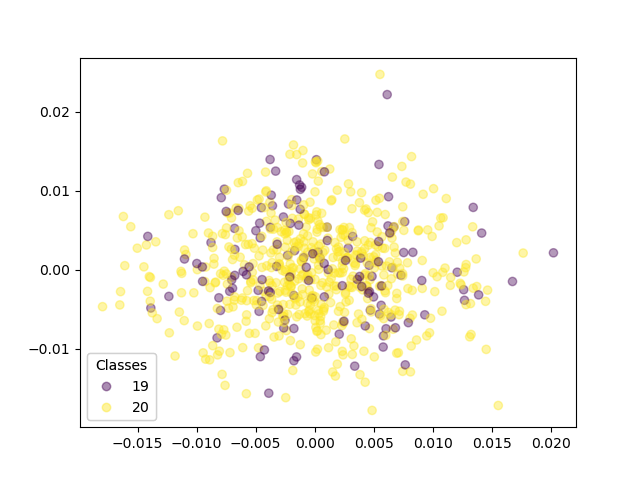

In [17]:
fig, ax = plt.subplots()
sc = ax.scatter(x_pcx[:, 0], x_pcx[:, 1], c=mapped_year_list,  alpha=0.4)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=title_list[sel.target.index])
plt.show()

In [ ]:
1. 年代を細切れにする(2000と2022)
2. センテンスBERTを用いる
PCAだけでよい
3. タイトルからドットを探す。(ベストアワード)
4. Kernel PCA

# 2000と２019の比較

In [84]:
df1 = out[(out['year'] == 2000)].sample(n=80)
df2 = out[(out['year'] == 2019)].sample(n=80)
out = pd.concat([df1, df2], axis=0)

SAMPLING_RATE = 1.0
sampled_out = out.sample(n=(int(len(out)*SAMPLING_RATE)), random_state=1)
title_list = out['title'].values
X = sampled_out.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(160, 2)

In [85]:
year_list = list(sampled_out['year'].values)
mapped_year_list = year_list

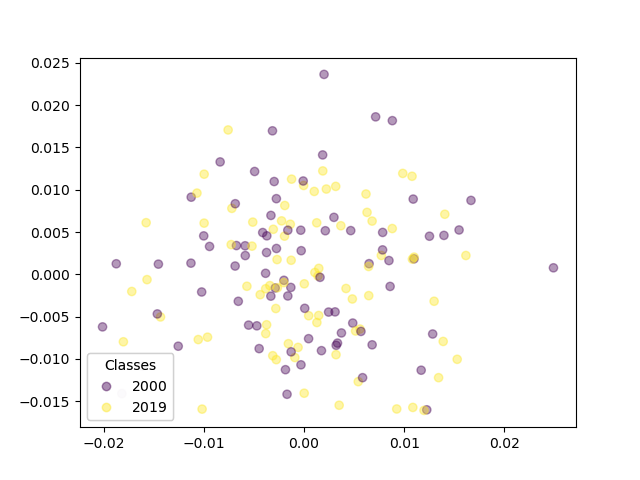

In [87]:
fig, ax = plt.subplots()
sc = ax.scatter(x_pcx[:, 0], x_pcx[:, 1], c=mapped_year_list,  alpha=0.4)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=title_list[sel.target.index])
plt.show()

# Doc2vecの入力を２０００年と２０１９のものだけにする

In [104]:
data_2000_2019 = origin_data[(origin_data['year'] == 2000) | (origin_data['year'] == 2019)]
docs = data_2000_2019.iloc[:]["abstract"]
docs_tokenized = [(nltk.word_tokenize(str(doc))) for doc in (docs)]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs_tokenized)]
model = Doc2Vec(documents, vector_size=128, window=2, min_count=1, workers=-1)

In [105]:
data = [[(i)] + list(model.dv[i]) for i in range(len(docs))]
column_names = ["type"]+["x_"+str(dim) for dim in range(model.vector_size)]
out = pd.DataFrame(data, columns=column_names)
out.insert(1, 'year', data_2000_2019['year'].values)
out.insert(2, 'title', data_2000_2019['title'].values)
out.insert(3, 'era_id', data_2000_2019['era_id'].values)
out

,type,year,title,era_id,x_0,x_1,x_2,x_3,x_4,x_5,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0,2019,Counterfactual Data Augmentation for Mitigatin...,20,-0.004087,-0.004671,-0.007719,0.006682,0.002786,0.000205,...,0.002859,0.006326,0.006951,0.004880,-0.004874,0.006770,-0.007366,0.000554,-0.005174,-0.000625
1,1,2019,Unsupervised Discovery of Gendered Language th...,20,0.002063,-0.006011,0.003093,0.001115,-0.000420,0.004858,...,-0.001561,0.004814,-0.005440,-0.006790,-0.007565,-0.006261,-0.005024,-0.001805,-0.001834,0.004910
2,2,2000,The State of the Art in Thai Language Processing,20,0.003528,0.004057,0.002054,0.001589,0.003578,0.006848,...,0.006334,-0.001039,0.007193,-0.006093,0.001928,0.006982,-0.007615,-0.000961,-0.006725,0.005595
3,3,2000,,20,-0.001633,0.004768,-0.003725,0.002522,-0.003051,-0.007043,...,-0.000792,0.005549,0.004894,0.003550,-0.000893,0.000306,-0.006690,0.000036,-0.005288,0.006117
4,4,2000,A Computational Approach to Zero-pronouns in S...,20,0.005179,-0.004625,-0.001097,0.002516,-0.003448,0.006718,...,0.002558,-0.000880,-0.002310,0.004100,0.003550,-0.005085,0.001933,0.006109,0.006555,0.002714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,2000,,20,0.007565,-0.004223,-0.003173,0.000415,-0.001304,-0.007389,...,0.000849,-0.007798,0.003943,0.006761,-0.002804,0.006028,-0.000283,-0.005539,0.002627,0.001116
848,848,2000,,20,-0.002872,-0.002223,0.001623,0.006020,0.000727,0.007506,...,-0.005694,0.000778,0.001609,-0.001723,-0.004138,-0.005853,0.000452,0.005764,-0.002201,-0.002614
849,849,2000,,20,0.002663,0.001805,-0.000249,-0.000984,0.006315,0.005253,...,-0.006289,0.002931,0.007339,0.003636,-0.000200,0.007149,-0.003980,-0.002115,0.006006,0.004502
850,850,2000,An Improved Parser for Data-Oriented Lexical-F...,20,-0.002957,0.001769,0.007487,-0.007307,-0.002542,0.001290,...,-0.002268,0.001394,0.001634,0.005196,-0.000622,0.000402,-0.000825,-0.001604,0.003840,0.000293


In [109]:
df1 = out[(out['year'] == 2000)].sample(n=80)
df2 = out[(out['year'] == 2019)].sample(n=80)
out = pd.concat([df1, df2], axis=0)

SAMPLING_RATE = 1.0
sampled_out = out.sample(n=(int(len(out)*SAMPLING_RATE)), random_state=1)
title_list = out['title'].values
X = sampled_out.iloc[:, 4:]
pca = PCA(n_components=2)
pca.fit(X)
x_pcx = pca.transform(X)
x_pcx.shape

(160, 2)

In [110]:
year_list = list(sampled_out['year'].values)
mapped_year_list = year_list

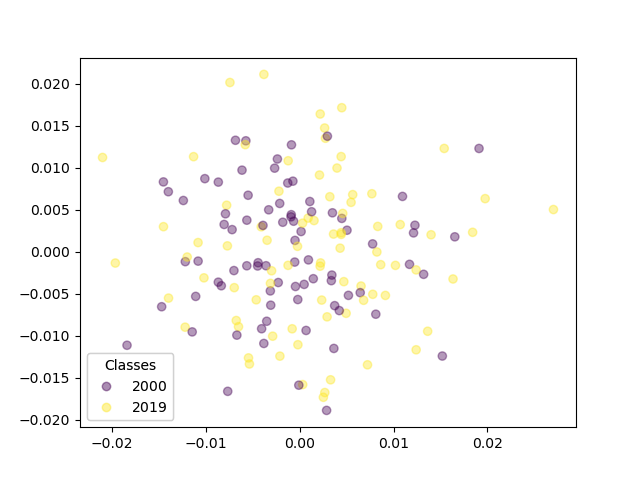

In [111]:
fig, ax = plt.subplots()
sc = ax.scatter(x_pcx[:, 0], x_pcx[:, 1], c=mapped_year_list,  alpha=0.4)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=title_list[sel.target.index])
plt.show()